In [1]:
import pandas as pd
import numpy as np
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn

In [2]:
print(pd)
print("pandas v"+pd.__version__)
print("matplotlib v"+matplotlib.__version__)
print("seaborn v"+seaborn.__version__)

<module 'pandas' from 'C:\\Users\\Napat-PC\\anaconda3\\envs\\tensorflow_nightly\\lib\\site-packages\\pandas\\__init__.py'>
pandas v1.1.2
matplotlib v3.3.2
seaborn v0.11.0


## Environment variables

In [3]:
## Define local database connection
MYSQL_HOST = 'localhost'
MYSQL_USER = 'root'
MYSQL_PASSWORD = 'password'
MYSQL_DB = 'f1_db'

# 1) Prepare data

In [4]:
def get_df(sql_statement):
    cnx = pymysql.connect(host=MYSQL_HOST, user=MYSQL_USER, password=MYSQL_PASSWORD, db=MYSQL_DB)
    df = pd.read_sql(sql_statement, con=cnx)
    cnx.close()
    return df

In [5]:
circuit_df = get_df(f"""
            SELECT * FROM f1_db.circuits;
            """)
circuit_df = circuit_df.drop(columns=["url"])

In [6]:
print(f"len = {len(circuit_df)}")
circuit_df.head()

len = 76


,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,NaN
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN


In [7]:
constructor_result_df = get_df(f"""
            SELECT * FROM f1_db.constructorresults;
            """)

In [8]:
print(f"len = {len(constructor_result_df)}")
constructor_result_df.head()

len = 11680


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,None
1,2,18,2,8.0,None
2,3,18,3,9.0,None
3,4,18,4,5.0,None
4,5,18,5,2.0,None


In [9]:
constructor_df = get_df(f"""
            SELECT * FROM f1_db.constructors;
            """)
constructor_df = constructor_df.drop(columns=["url"])

In [10]:
print(f"len = {len(constructor_df)}")
constructor_df.head()

len = 211


,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [11]:
constructor_standing_df = get_df(f"""
            SELECT * FROM f1_db.constructorstandings;
            """)

In [12]:
print(f"len = {len(constructor_standing_df)}")
constructor_standing_df.head()

len = 12436


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [13]:
driver_df = get_df(f"""
            SELECT * FROM f1_db.drivers;
            """)
driver_df = driver_df.drop(columns=["url"])

In [14]:
print(f"len = {len(driver_df)}")
driver_df.head()

len = 848


,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [15]:
driver_standing_df = get_df(f"""
            SELECT * FROM f1_db.driverstandings;
            """)

In [16]:
print(f"len = {len(driver_standing_df)}")
driver_standing_df.head()

len = 32815


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [17]:
laptime_df = get_df(f"""
            SELECT * FROM f1_db.laptimes;
            """)

In [18]:
print(f"len = {len(laptime_df)}")
laptime_df.head()

len = 485110


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [19]:
pitstop_df = get_df(f"""
            SELECT * FROM f1_db.pitstops;
            """)

In [20]:
print(f"len = {len(pitstop_df)}")
pitstop_df.head()

len = 7843


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,0 days 17:05:23,26.898,26898
1,841,30,1,1,0 days 17:05:52,25.021,25021
2,841,17,1,11,0 days 17:20:48,23.426,23426
3,841,4,1,12,0 days 17:22:34,23.251,23251
4,841,13,1,13,0 days 17:24:10,23.842,23842


In [21]:
qualifying_df = get_df(f"""
            SELECT * FROM f1_db.qualifying;
            """)

In [22]:
print(f"len = {len(qualifying_df)}")
qualifying_df.head()

len = 8594


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [23]:
race_df = get_df(f"""
            SELECT * FROM f1_db.races;
            """)

In [24]:
print(f"len = {len(race_df)}")
race_df.head()

len = 1035


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,0 days 06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,0 days 09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,0 days 07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,0 days 12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,0 days 12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [25]:
result_df = get_df(f"""
            SELECT t1.*,t2.status FROM f1_db.results as t1 join f1_db.status as t2 on t1.statusId = t2.statusId;
            """)

In [26]:
print(f"len = {len(result_df)}")
result_df.head()

len = 24860


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,Finished
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1,Finished
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1,Finished
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1,Finished
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1,Finished


In [27]:
status_df = get_df(f"""
            SELECT * FROM f1_db.status;
            """)

In [28]:
print(f"len = {len(status_df)}")
status_df.head()

len = 136


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


# 2) EDA

### Circuit analysis

#### no of events by country

In [29]:
get_df(f"""
SELECT country, count(*) as no_of_events  FROM f1_db.races as t1 join f1_db.circuits as t2 on t1.circuitId = t2.circuitId group by country order by no_of_events desc;
""").head(5)

,country,no_of_events
0,Italy,100
1,Germany,79
2,UK,75
3,USA,70
4,Monaco,66


#### no of events by location

In [30]:
get_df(f"""
SELECT country, location, count(*) as no_of_events  FROM f1_db.races as t1 join f1_db.circuits as t2 on t1.circuitId = t2.circuitId group by country,location order by no_of_events desc;
""").head(5)

,country,location,no_of_events
0,Italy,Monza,70
1,Monaco,Monte-Carlo,66
2,UK,Silverstone,55
3,Belgium,Spa,53
4,Germany,Nürburg,41


### no of events by location in past centuries

In [31]:
def group_year(y):
    for a,b in [(a-19,a) for a in list(range(2020,1960,-20))]+[(1950,1960)]:
        if y >= a and y <= b:
            return f"{a}-{b}" 
    return "unclassfied"

In [710]:
df = get_df(f"""
SELECT year,location,country FROM f1_db.races as t1 join f1_db.circuits as t2 on t1.circuitId = t2.circuitId
""")
df["year"] = df["year"].apply(lambda a: group_year(a))
df = df.reset_index()
df = df.groupby(['location','country','year']).count()
df = df.sort_values(["year","index"],ascending=False)
df = df.reset_index()
df = df[df["year"] != "unclassfied"]
df = df.sort_values('index',ascending = False).groupby('year').head(5)
df = df.sort_values(["year","index","country"],ascending=False)
df["location"] = df["location"] + ", " + df["country"]
df = df.rename(columns={"index":"no_of_events"})
df.head()

,location,country,year,no_of_events
0,"Silverstone, UK",UK,2001-2020,21
2,"Montmeló, Spain",Spain,2001-2020,20
3,"Monza, Italy",Italy,2001-2020,20
1,"Budapest, Hungary",Hungary,2001-2020,20
6,"São Paulo, Brazil",Brazil,2001-2020,19


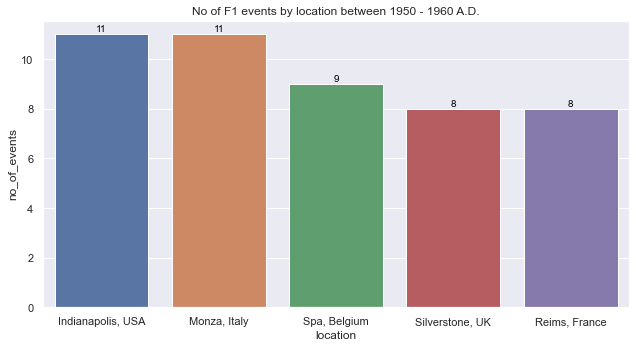

In [716]:
df_2 = df[df["year"]=="1950-1960"].copy()
df_2 = df_2.reset_index(drop=True)
sns.set(rc={'figure.figsize':(9,5)})
g=sns.barplot(x='location',y='no_of_events',data=df_2)
g.set_title("No of F1 events by location between 1950 - 1960 A.D.")
for i,p in enumerate(g.patches):
             g.annotate(f"{df_2['no_of_events'].iloc[i]}", (p.get_x() + p.get_width() / 2. , p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

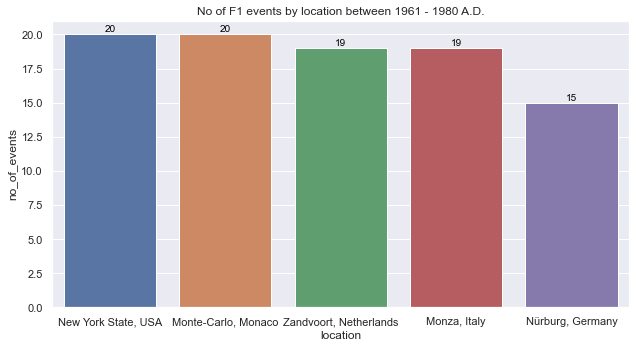

In [719]:
df_2 = df[df["year"]=="1961-1980"].copy()
df_2 = df_2.reset_index(drop=True)
sns.set(rc={'figure.figsize':(9,5)})
g=sns.barplot(x='location',y='no_of_events',data=df_2)
g.set_title("No of F1 events by location between 1961 - 1980 A.D.")
for i,p in enumerate(g.patches):
             g.annotate(f"{df_2['no_of_events'].iloc[i]}", (p.get_x() + p.get_width() / 2. , p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

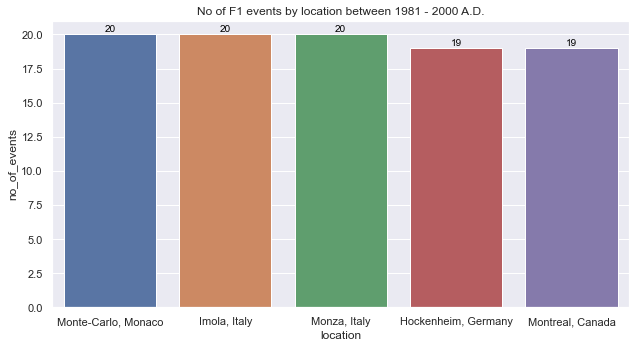

In [720]:
df_2 = df[df["year"]=="1981-2000"].copy()
df_2 = df_2.reset_index(drop=True)
sns.set(rc={'figure.figsize':(9,5)})
g=sns.barplot(x='location',y='no_of_events',data=df_2)
g.set_title("No of F1 events by location between 1981 - 2000 A.D.")
for i,p in enumerate(g.patches):
             g.annotate(f"{df_2['no_of_events'].iloc[i]}", (p.get_x() + p.get_width() / 2. , p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

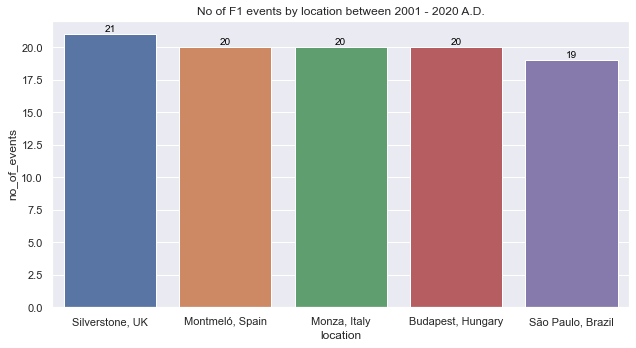

In [718]:
df_3 = df[df["year"]=="2001-2020"].copy()
df_3 = df_3.reset_index(drop=True)
sns.set(rc={'figure.figsize':(9,5)})
g=sns.barplot(x='location',y='no_of_events',data=df_3)
g.set_title("No of F1 events by location between 2001 - 2020 A.D.")
for i,p in enumerate(g.patches):
             g.annotate(f"{df_3['no_of_events'].iloc[i]}", (p.get_x() + p.get_width() / 2. , p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

#### no of events by country for each year

In [35]:
df_4 = get_df(f"""
SELECT year,country FROM f1_db.races as t1 join f1_db.circuits as t2 on t1.circuitId = t2.circuitId
""")
df_4["year"] = df_4["year"].apply(lambda a: group_year(a))
df_4 = df_4.reset_index()
df_4 = df_4.groupby(['country','year']).count()
df_4 = df_4.sort_values(["year","index"],ascending=False)
df_4 = df_4.reset_index()
df_4 = df_4[df_4["year"] != "unclassfied"]
# df = df.sort_values('index',ascending = False).groupby('year').head(5)
df_4 = df_4.rename(columns={"index":"no_of_events"})
df_4 = df_4.sort_values(["year","no_of_events"],ascending=[True,False])
df_4 = df_4[df_4["country"].isin(["Italy","Germany","USA","UK","Monaco"])]

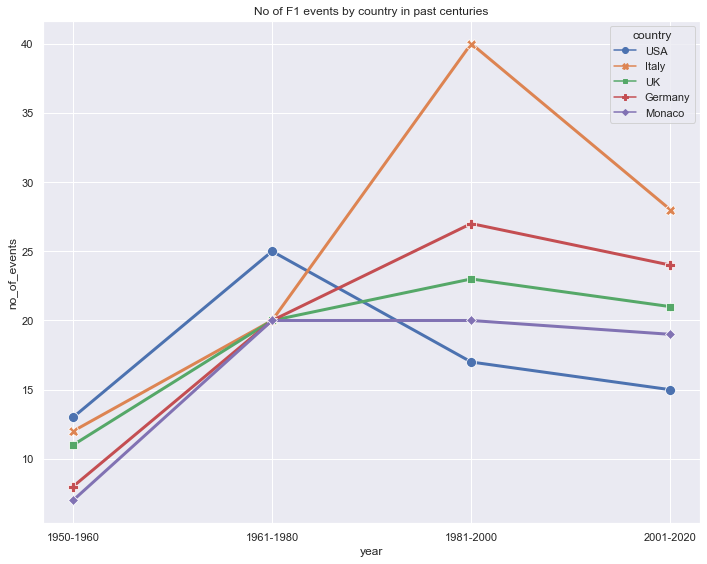

In [36]:
sns.set(rc={'figure.figsize':(10,8)})
g=sns.lineplot(
    data=df_4,
    x="year", y="no_of_events", hue="country", style="country",
    markers=True, dashes=False, linewidth = 3, markersize=10
)
g.set_title("No of F1 events by country in past centuries")
plt.tight_layout()

### ConstructorResult analysis

#### Gross point awarded for team in championship

In [37]:
df_5 = get_df(f"""
SELECT constructor, sum(points) as total_points FROM f1_db.constructor_point_view group by constructor order by total_points desc;
""")
df_5.head(10)

,constructor,total_points
0,Ferrari,8395.5
1,McLaren,5566.5
2,Mercedes,5522.0
3,Red Bull,4934.5
4,Williams,3534.0
5,Renault,1716.0
6,Force India,1084.0
7,Team Lotus,918.0
8,Benetton,861.5
9,Lotus F1,706.0


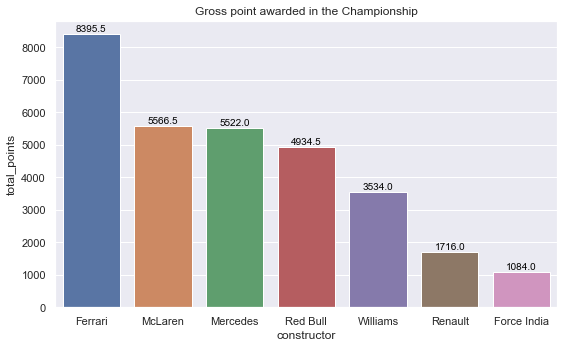

In [721]:
sns.set(rc={'figure.figsize':(8,5)})
g=sns.barplot(x='constructor',y='total_points',data=df_5.head(7))
g.set_title("Gross point awarded in the Championship")
for i,p in enumerate(g.patches):
             g.annotate(f"{df_5['total_points'].iloc[i]}", (p.get_x() + p.get_width() / 2. , p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

#### no of events by grand prix

In [39]:
df_6 = get_df(f"""
SELECT name as grand_prix,count(*) as no_of_events FROM f1_db.races group by name order by no_of_events desc;
""")
df_6.head(10)

,grand_prix,no_of_events
0,Italian Grand Prix,71
1,British Grand Prix,71
2,Monaco Grand Prix,66
3,Belgian Grand Prix,65
4,German Grand Prix,64
5,French Grand Prix,60
6,Spanish Grand Prix,50
7,Canadian Grand Prix,50
8,Brazilian Grand Prix,47
9,United States Grand Prix,41


#### no of events by circuit

In [536]:
get_df(f"""
SELECT t2.circuitRef,location, count(*) as no_of_events FROM  races as t1, circuits as t2 where t1.circuitId = t2.circuitId group by circuitRef,location order by no_of_events desc
""").head(7)

,circuitRef,location,no_of_events
0,monza,Monza,70
1,monaco,Monte-Carlo,66
2,silverstone,Silverstone,55
3,spa,Spa,53
4,nurburgring,Nürburg,41
5,villeneuve,Montreal,40
6,interlagos,São Paulo,37


#### Gross point pivot table

In [40]:
df_7 = get_df(f"""
SELECT grand_prix, constructor, sum(points) as total_points FROM f1_db.constructor_point_view group by grand_prix,constructor order by grand_prix,constructor
""")

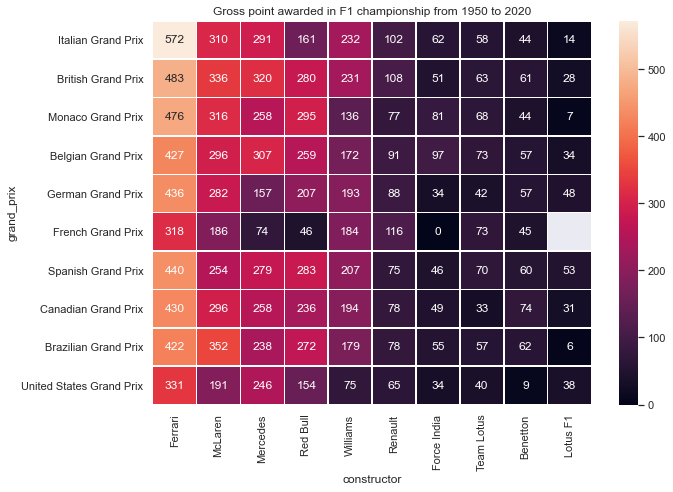

In [725]:
df_8 = df_7.copy()
df_8 = df_8[df_8["grand_prix"].isin(df_6.head(10)["grand_prix"])]
df_8 = df_8[df_8["constructor"].isin(df_5.head(10)["constructor"])]

df_9 = df_8.pivot("grand_prix","constructor","total_points")
df_9 = df_9.reindex(df_6.head(10)["grand_prix"])
df_9 = df_9.reindex(df_5.head(10)["constructor"],axis="columns")

f, ax = plt.subplots(figsize=(10, 7))
g= sns.heatmap(df_9, annot=True,fmt=".0f", linewidths=.5, ax=ax)
g.set_title("Gross point awarded in F1 championship from 1950 to 2020")
plt.tight_layout()

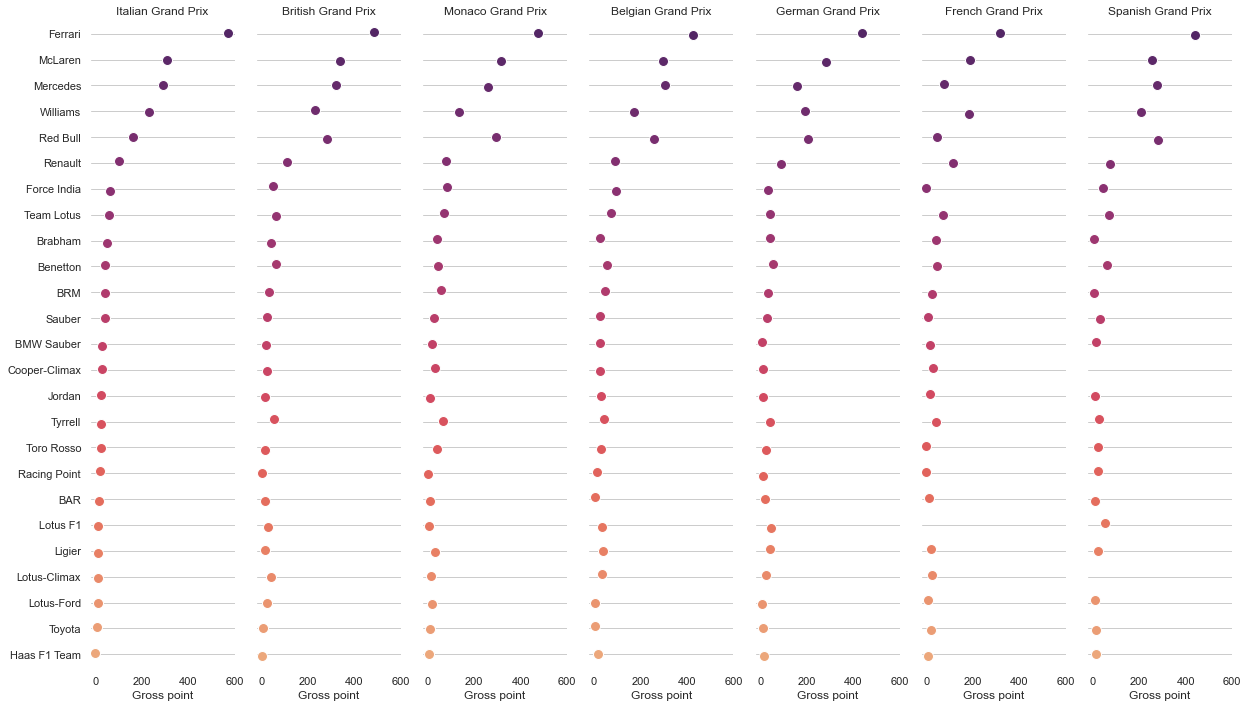

In [125]:
sns.set_theme(style="whitegrid")
df_9 = df_7.copy()
df_9 = df_9[df_9["grand_prix"].isin(df_6.head(7)["grand_prix"])]
df_9 = df_9[df_9["constructor"].isin(df_5.head(25)["constructor"])]
df_9 = df_9.pivot("constructor","grand_prix","total_points")
df_9 = df_9.reindex(df_6.head(7)["grand_prix"],axis="columns")
df_9 = df_9.reindex(df_5.head(25)["constructor"])
df_9 = df_9.reset_index()
g = sns.PairGrid(df_9.sort_values("Italian Grand Prix", ascending=False), x_vars=df_9.columns[1:], y_vars=["constructor"],
                 height=10, aspect=0.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-20, 600), xlabel="Gross point", ylabel="")

# # Use semantically meaningful titles for the columns
titles = df_9.columns[1:]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()

### Constructor analysis

#### Top nationality constructor 

In [43]:
get_df(f"""
SELECT nationality,count(*) as no_of_constructors FROM f1_db.constructors group by nationality order by no_of_constructors desc;
""").head(10)

,nationality,no_of_constructors
0,British,86
1,American,39
2,Italian,31
3,French,12
4,German,10
5,Japanese,5
6,Swiss,4
7,Dutch,3
8,South African,3
9,Russian,2


### ConstructorStanding analysis

In [44]:
df_10 = get_df(f"""
SELECT * FROM f1_db.constructor_standing_view;
""")
curr_constructor = None
curr_year = None
prev_wins = 0
prev_points = 0
for i,v in df_10.iterrows():
    if curr_constructor != v.constructor:
        curr_constructor = v.constructor
        prev_wins = 0
        prev_points = 0
        curr_year = v.year
    if curr_year != v.year:
        prev_wins = 0
        prev_points = 0
        curr_year = v.year
    if v.wins > prev_wins:
        df_10.loc[i, "is_win"] = 1
    else:
        df_10.loc[i, "is_win"] = 0
    df_10.loc[i,"race_point"] = v.points - prev_points
    prev_wins = v.wins
    prev_points = v.points
df_10.head()

,constructor,nationality,year,round,grand_prix,date,location,circuit_country,points,position,positionText,wins,is_win,race_point
0,AGS,French,1986,13,Italian Grand Prix,1986-09-07,Monza,Italy,0.0,14,14,0,0.0,0.0
1,AGS,French,1986,14,Portuguese Grand Prix,1986-09-21,Estoril,Portugal,0.0,14,14,0,0.0,0.0
2,AGS,French,1986,15,Mexican Grand Prix,1986-10-12,Mexico City,Mexico,0.0,14,14,0,0.0,0.0
3,AGS,French,1986,16,Australian Grand Prix,1986-10-26,Adelaide,Australia,0.0,14,14,0,0.0,0.0
4,AGS,French,1987,1,Brazilian Grand Prix,1987-04-12,Rio de Janeiro,Brazil,0.0,8,8,0,0.0,0.0


In [46]:
df_11 = df_10.copy()
df_11 = df_11.groupby(["grand_prix","constructor"]).agg({"is_win":["sum"],"race_point":["sum"]})
df_11 = df_11.reset_index()
df_11.columns = df_11.columns.droplevel(1)
df_11 = df_11.rename({"is_win":"total_wins","race_point":"total_points"},axis="columns")
df_11

,grand_prix,constructor,total_wins,total_points
0,70th Anniversary Grand Prix,Alfa Romeo,0.0,0.0
1,70th Anniversary Grand Prix,AlphaTauri,0.0,1.0
2,70th Anniversary Grand Prix,Ferrari,0.0,12.0
3,70th Anniversary Grand Prix,Haas F1 Team,0.0,0.0
4,70th Anniversary Grand Prix,McLaren,0.0,2.0
...,...,...,...,...
2408,United States Grand Prix West,Theodore,0.0,2.0
2409,United States Grand Prix West,Toleman,0.0,0.0
2410,United States Grand Prix West,Tyrrell,0.0,17.0
2411,United States Grand Prix West,Williams,1.0,28.0


#### Gross victories in grand prix

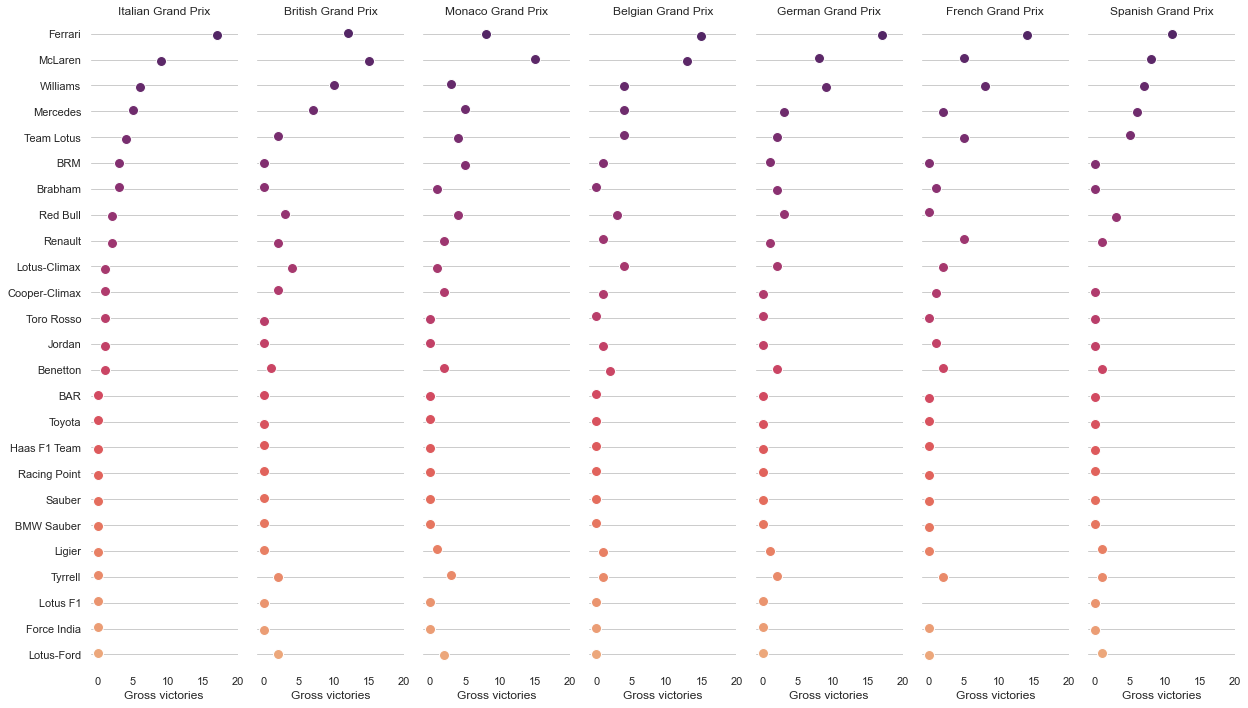

In [122]:
sns.set_theme(style="whitegrid")
df_12 = df_11.copy()
df_12 = df_12[df_12["grand_prix"].isin(df_6.head(7)["grand_prix"])]
df_12 = df_12[df_12["constructor"].isin(df_5.head(25)["constructor"])]
df_12 = df_12.pivot("constructor","grand_prix","total_wins")
df_12 = df_12.reindex(df_6.head(7)["grand_prix"],axis="columns")
df_12 = df_12.reindex(df_5.head(25)["constructor"])
df_12 = df_12.reset_index()
g = sns.PairGrid(df_12.sort_values("Italian Grand Prix", ascending=False), x_vars=df_12.columns[1:], y_vars=["constructor"],
                 height=10, aspect=0.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-1, 20), xlabel="Gross victories", ylabel="", xticks=range(0,21,5))

# # Use semantically meaningful titles for the columns
titles = df_12.columns[1:]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()

In [776]:
def plot_team_performance(constructor, performance_start_year, performance_end_year, year_highlight = None):
    df_13 = df_10[df_10["constructor"] == constructor].copy()
    df_13 = df_13[df_13["round"] <= 16]
    if year_highlight is None:
        df_13 = df_13[(df_13["year"] >= performance_start_year) & (df_13["year"] <= performance_end_year)]
    else:
        df_13 = df_13[(df_13["year"] >= performance_start_year) & (df_13["year"] <= np.array([performance_end_year,year_highlight]).max())]
    performance_start_year = df_13["year"].min()

    f, ax = plt.subplots(figsize=(9, 6))
    ax.set_xticks(range(1,18))
    
    ## calculate first round and final round position mean
    df_14 = df_13.pivot("year","round","position").copy()
    first_round_mean = round(df_14.iloc[:,0].mean(),1)
    final_round_mean = round(df_14.iloc[:,-1].mean(),1)
    print(f"first round position avg = {first_round_mean}, final round position avg = {final_round_mean}")
    
    if year_highlight is not None:
        sns.lineplot(data=df_13,x="round",y="position", color="#6E5C81", linewidth=2.5,markers=True, markersize=9, alpha=0.9)
        sns.lineplot(data=df_13[df_13["year"]==year_highlight],x="round",y="position", color="#4E2A81",linewidth=2.5, marker="o", markersize=9)
        ax.set_title(f"""{constructor} team position past performance during {performance_start_year} to {performance_end_year} compare to {year_highlight}\n
        (first round avg pos = {first_round_mean}, final round avg pos = {final_round_mean})""")
#     ax.legend(bbox_to_anchor=(0.99, 1.0))
    else:
        sns.lineplot(data=df_13,x="round",y="position",hue="year",style="year",palette="tab10", linewidth=2.5,markers=True, markersize=9)
        ax.set_title(f"""{constructor} team position past performance during {performance_start_year} to {performance_end_year}\n
        (first round avg pos = {first_round_mean}, final round avg pos = {final_round_mean})""")
    plt.tight_layout()

first round position avg = 1.8, final round position avg = 2.2


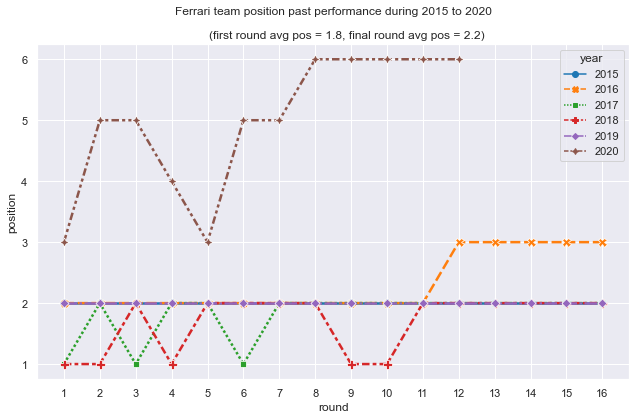

In [757]:
plot_team_performance("Ferrari",2015,2020, None)

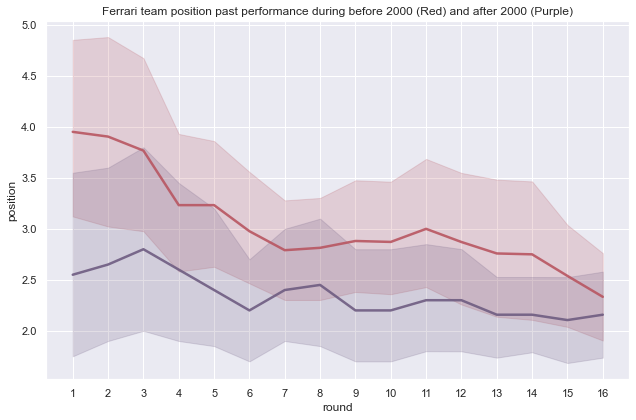

In [767]:
constructor = "Ferrari"
df_13 = df_10[df_10["constructor"] == constructor].copy()
df_13 = df_13[df_13["round"] <= 16]

df_13_1 = df_13[df_13["year"]<=2000]
df_13_2 = df_13[df_13["year"]>2000]

f, ax = plt.subplots(figsize=(9, 6))
ax.set_xticks(range(1,22))
sns.lineplot(data=df_13_1,x="round",y="position", color="#b85661", linewidth=2.5,markers=True, markersize=9, alpha=0.9)
sns.lineplot(data=df_13_2,x="round",y="position", color="#6E5C81", linewidth=2.5,markers=True, markersize=9, alpha=0.9)
ax.set_title(f"Ferrari team position past performance during before 2000 (Red) and after 2000 (Purple)")
plt.tight_layout()

first round position avg = 3.5, final round position avg = 2.2


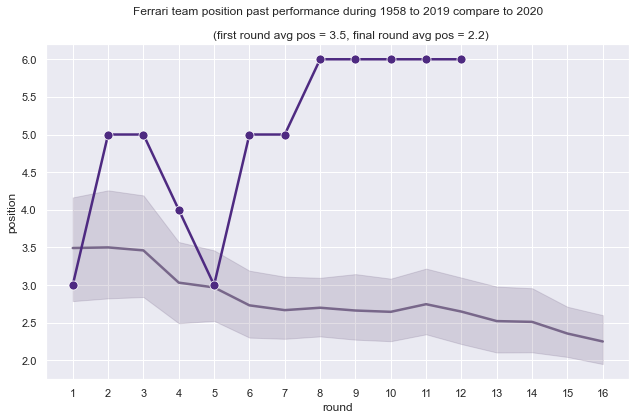

In [777]:
plot_team_performance("Ferrari",1950,2019, 2020)

first round position avg = 4.0, final round position avg = 3.4


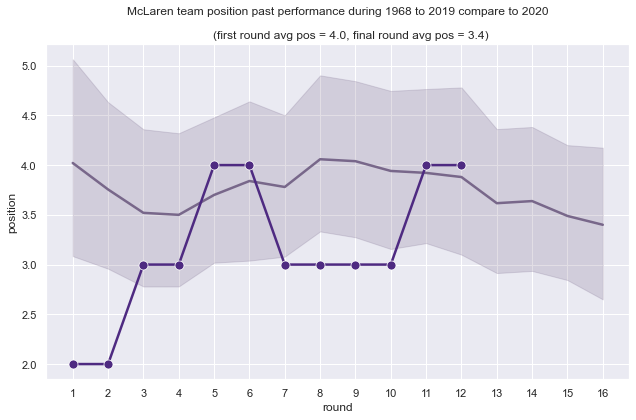

In [778]:
plot_team_performance("McLaren",1950,2019,2020)

first round position avg = 3.2, final round position avg = 2.1


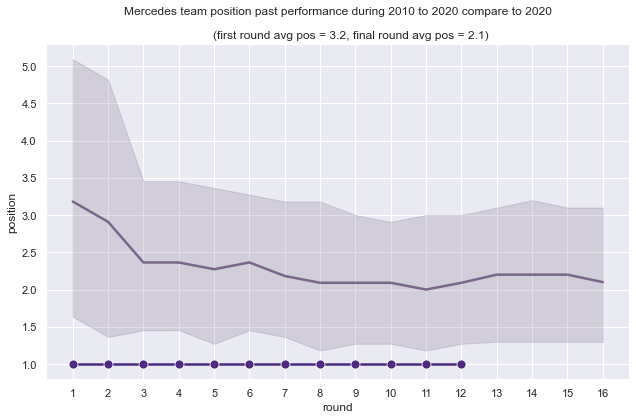

In [779]:
plot_team_performance("Mercedes",1950,2020,2020)

first round position avg = 4.9, final round position avg = 3.3


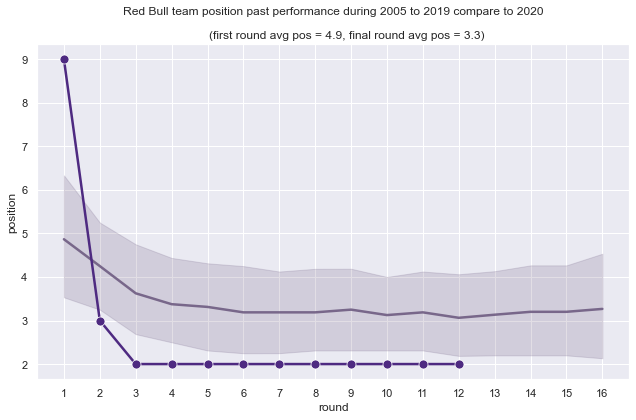

In [780]:
plot_team_performance("Red Bull",1950,2019,2020)

first round position avg = 5.0, final round position avg = 4.7


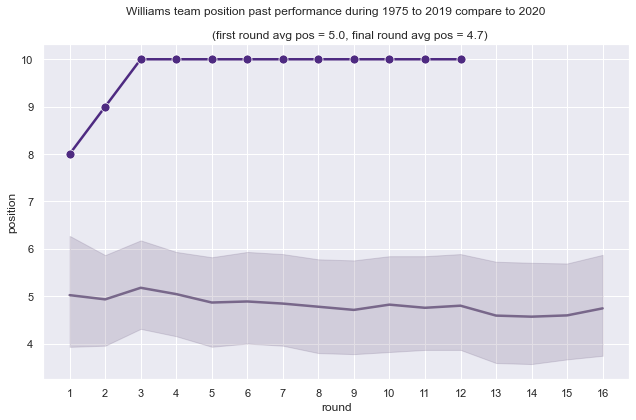

In [781]:
plot_team_performance("Williams",1950,2019,2020)

### Driver analysis

In [55]:
get_df("""
SELECT nationality, count(*) as no_of_drivers FROM f1_db.drivers group by nationality order by no_of_drivers desc;
""").head(5)

,nationality,no_of_drivers
0,British,164
1,American,157
2,Italian,99
3,French,73
4,German,49


#### DriverStanding analysis

In [133]:
df_15 = get_df(f"""
SELECT * FROM f1_db.driver_standing_view;
""")
curr_driver = None
curr_year = None
prev_wins = 0
prev_points = 0
for i,v in df_15.iterrows():
    if curr_driver != v.driverRef:
        curr_driver = v.driverRef
        prev_wins = 0
        prev_points = 0
        curr_year = v.year
    if curr_year != v.year:
        prev_wins = 0
        prev_points = 0
        curr_year = v.year
    if v.wins > prev_wins:
        df_15.loc[i, "is_win"] = 1
    else:
        df_15.loc[i, "is_win"] = 0
    df_15.loc[i,"race_point"] = v.points - prev_points
    prev_wins = v.wins
    prev_points = v.points
df_15.head()

,driverRef,forename,surname,code,dob,age_at_race,nationality,year,round,grand_prix,circuitRef,location,circuit_country,date,points,position,wins,is_win,race_point
0,abate,Carlo,Abate,None,1932-07-10,30.0,Italian,1962,4,French Grand Prix,essarts,Rouen,France,1962-07-08,0.0,30,0,0.0,0.0
1,abate,Carlo,Abate,None,1932-07-10,30.0,Italian,1962,5,British Grand Prix,aintree,Liverpool,UK,1962-07-21,0.0,33,0,0.0,0.0
2,abate,Carlo,Abate,None,1932-07-10,30.1,Italian,1962,6,German Grand Prix,nurburgring,Nürburg,Germany,1962-08-05,0.0,37,0,0.0,0.0
3,abate,Carlo,Abate,None,1932-07-10,30.2,Italian,1962,7,Italian Grand Prix,monza,Monza,Italy,1962-09-16,0.0,37,0,0.0,0.0
4,abate,Carlo,Abate,None,1932-07-10,30.3,Italian,1962,8,United States Grand Prix,watkins_glen,New York State,USA,1962-10-07,0.0,42,0,0.0,0.0


#### Gross point awarded for driver in championship

In [71]:
df_16 = df_15[["driverRef","race_point"]].groupby(["driverRef"]).sum(["race_point"]).copy()
df_16 = df_16.reset_index()
df_16 = df_16.sort_values("race_point",ascending=False)
df_16 = df_16.reset_index(drop=True)
df_16.head(7)

,driverRef,race_point
0,hamilton,3687.0
1,vettel,3003.0
2,alonso,1899.0
3,raikkonen,1861.0
4,rosberg,1594.5
5,michael_schumacher,1566.0
6,bottas,1468.0


#### Gross victories for driver in championship

In [72]:
df_17 = df_15[["driverRef","is_win"]].groupby(["driverRef"]).sum(["is_win"]).copy()
df_17 = df_17.reset_index()
df_17 = df_17.sort_values("is_win",ascending=False)
df_17 = df_17.reset_index(drop=True)
df_17.head(7)

,driverRef,is_win
0,hamilton,92.0
1,michael_schumacher,91.0
2,vettel,53.0
3,prost,51.0
4,senna,41.0
5,alonso,32.0
6,mansell,31.0


In [63]:
# pd.set_option('display.max_rows', 50)

In [74]:
df_18 = df_15.copy()
df_18 = df_18.groupby(["grand_prix","driverRef"]).agg({"is_win":["sum"],"race_point":["sum"]})
df_18 = df_18.reset_index()
df_18.columns = df_18.columns.droplevel(1)
df_18 = df_18.rename({"is_win":"total_wins","race_point":"total_points"},axis="columns")
df_18.head()

,grand_prix,driverRef,total_wins,total_points
0,70th Anniversary Grand Prix,albon,0.0,10.0
1,70th Anniversary Grand Prix,bottas,0.0,15.0
2,70th Anniversary Grand Prix,gasly,0.0,0.0
3,70th Anniversary Grand Prix,giovinazzi,0.0,0.0
4,70th Anniversary Grand Prix,grosjean,0.0,0.0


#### Gross points in grand prix

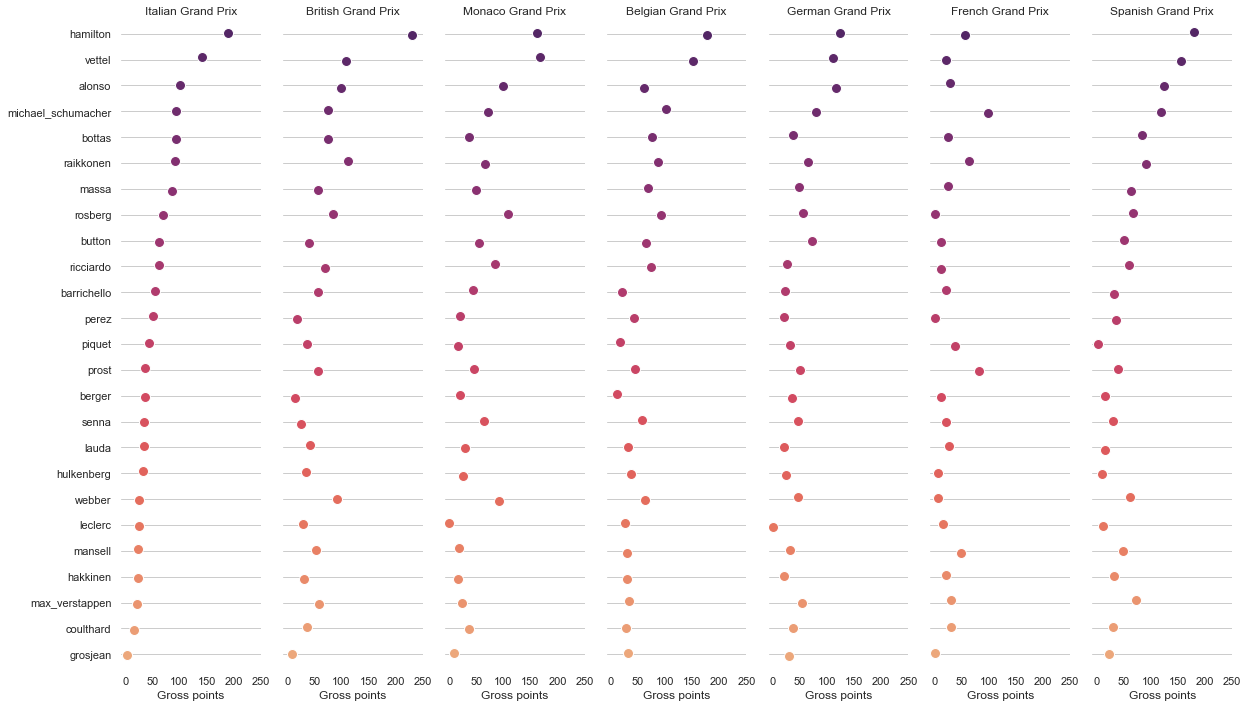

In [127]:
sns.set_theme(style="whitegrid")
df_19 = df_18.copy()
df_19 = df_19[df_19["grand_prix"].isin(df_6.head(7)["grand_prix"])]
df_19 = df_19[df_19["driverRef"].isin(df_16.head(25)["driverRef"])]
df_19 = df_19.pivot("driverRef","grand_prix","total_points")
df_19 = df_19.reindex(df_6.head(7)["grand_prix"],axis="columns")
df_19 = df_19.reindex(df_16.head(25)["driverRef"])
df_19 = df_19.reset_index()
g = sns.PairGrid(df_19.sort_values("Italian Grand Prix", ascending=False), x_vars=df_19.columns[1:], y_vars=["driverRef"],
                 height=10, aspect=0.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-8, 250), xlabel="Gross points", ylabel="",xticks=[0,50,100,150,200,250])
# # Use semantically meaningful titles for the columns
titles = df_19.columns[1:]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()

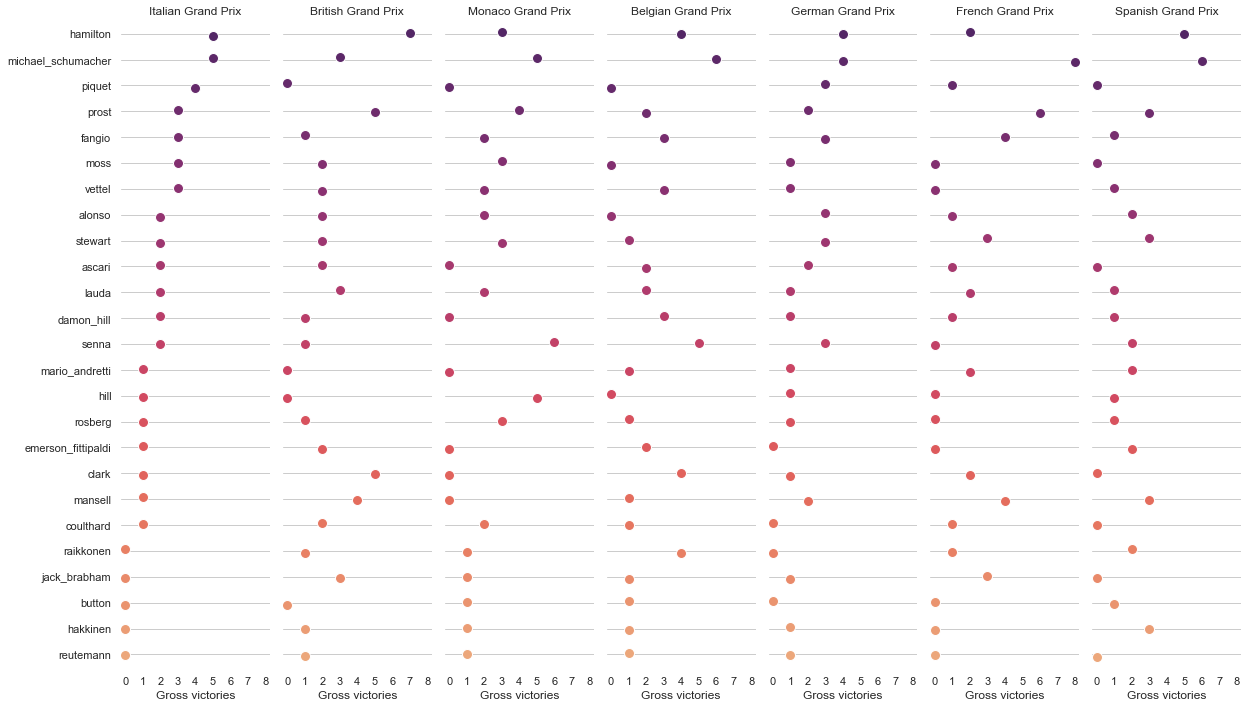

In [129]:
sns.set_theme(style="whitegrid")
df_20 = df_18.copy()
df_20 = df_20[df_20["grand_prix"].isin(df_6.head(7)["grand_prix"])]
df_20 = df_20[df_20["driverRef"].isin(df_17.head(25)["driverRef"])]
df_20 = df_20.pivot("driverRef","grand_prix","total_wins")
df_20 = df_20.reindex(df_6.head(7)["grand_prix"],axis="columns")
df_20 = df_20.reindex(df_17.head(25)["driverRef"])
df_20 = df_20.reset_index()
g = sns.PairGrid(df_20.sort_values("Italian Grand Prix", ascending=False), x_vars=df_20.columns[1:], y_vars=["driverRef"],
                 height=10, aspect=0.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-0.25, 8.25), xlabel="Gross victories", ylabel="",xticks=range(0,9))
# # Use semantically meaningful titles for the columns
titles = df_20.columns[1:]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()

In [204]:
def get_total_race_points_by_age_range(start_year, end_year, driver_standing_view_df):
    df = driver_standing_view_df.copy()
    df = df[(df["year"]>= start_year) & (df["year"] <= end_year)]
    df = df[["age_at_race","race_point"]]
    df["age_at_race_band"] = pd.qcut(df['age_at_race'],precision=0, q=4)
    df = df.reset_index(drop=True)

    df = df[["age_at_race_band","race_point"]].groupby(["age_at_race_band"]).sum()
    df = df.reset_index()
    df = df.rename(columns={"race_point":"total_race_points","age_at_race_band":"age_range"})
    return df

### Total race points by age range

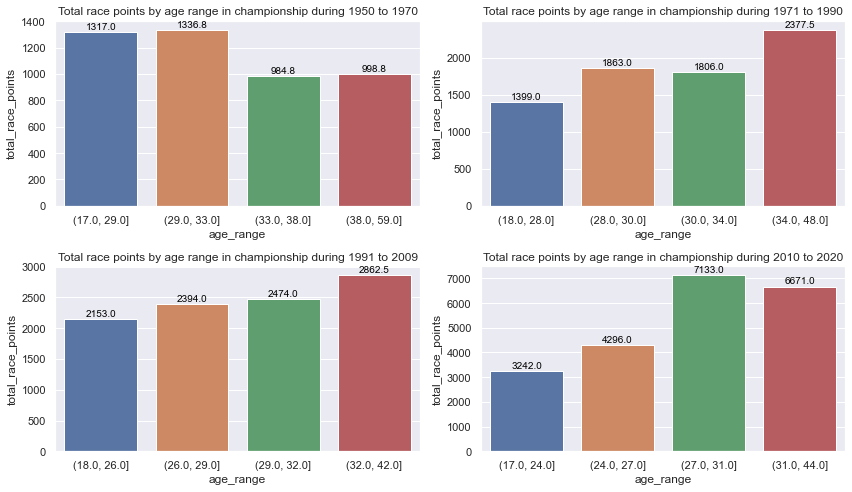

In [220]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=False)

years_list = [(1950,1970), (1971,1990), (1991,2009), (2010,2020)]
axs_list = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for ax, year in zip(axs_list,years_list):
    df = get_total_race_points_by_age_range(year[0], year[1], df_15)
    g = sns.barplot(x='age_range',y='total_race_points',data=df, ax=ax)
    g.set_title(f"Total race points by age range in championship during {year[0]} to {year[1]}")
    for i,p in enumerate(g.patches):
                 g.annotate("{:.1f}".format(df['total_race_points'].iloc[i]), (p.get_x() + p.get_width() / 2. , p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

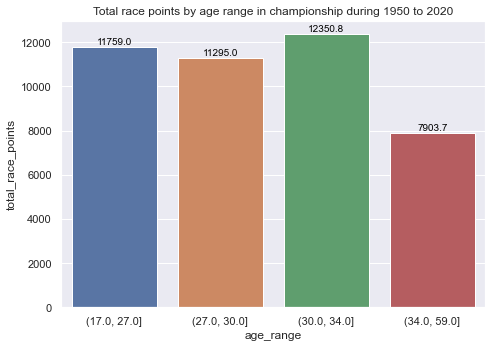

In [792]:
f, ax = plt.subplots(figsize=(7, 5))
df = get_total_race_points_by_age_range(1950, 2020, df_15)
g = sns.barplot(x='age_range',y='total_race_points',data=df)
g.set_title(f"Total race points by age range in championship during {1950} to {2020}")
for i,p in enumerate(g.patches):
    g.annotate("{:.1f}".format(df['total_race_points'].iloc[i]), (p.get_x() + p.get_width() / 2. , p.get_height()),
               ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

In [786]:
def plot_driver_performance(driver, performance_start_year, performance_end_year, year_highlight = None):
    df = df_15[df_15["driverRef"] == driver].copy()
    if year_highlight is None:
        df = df[(df["year"] >= performance_start_year) & (df["year"] <= performance_end_year)]
    else:
        df = df[(df["year"] >= performance_start_year) & (df["year"] <= np.array([performance_end_year,year_highlight]).max())]
    performance_start_year = df["year"].min()
    if performance_end_year > df["year"].max():
        performance_end_year = df["year"].max()        

    f, ax = plt.subplots(figsize=(9, 6))
    ax.set_xticks(range(1,22))

    df_2 = df.pivot("year","round","position").copy()
    first_round_mean = round(df_2.iloc[:,0].mean(),1)
    final_round_mean = round(df_2.iloc[:,-1].mean(),1)
    print(f"first round position avg = {first_round_mean}, final round position avg = {final_round_mean}")
    
    if year_highlight is not None:
        sns.lineplot(data=df,x="round",y="position", color="#6E5C81", linewidth=2.5,markers=True, markersize=9, alpha=0.9)
        sns.lineplot(data=df[df["year"]==year_highlight],x="round",y="position", color="#4E2A81",linewidth=2.5, marker="o", markersize=9)
        ax.set_title(f"""{driver} position past performance during {performance_start_year} to {performance_end_year} compare to {year_highlight}\n
        (first round avg pos = {first_round_mean}, final round avg pos = {final_round_mean})
        """)
#     ax.legend(bbox_to_anchor=(0.99, 1.0))
    else:
        sns.lineplot(data=df,x="round",y="position",hue="year",style="year",palette="tab10", linewidth=2.5,markers=True, markersize=9)
        ax.set_title(f"{driver} position past performance during {performance_start_year} to {performance_end_year}")
    ax.set_yticks(range(1,11))
    ax.set_ylim(0,11)
    plt.tight_layout()
    plt.show()
    return f,ax

first round position avg = 3.8, final round position avg = 1.3


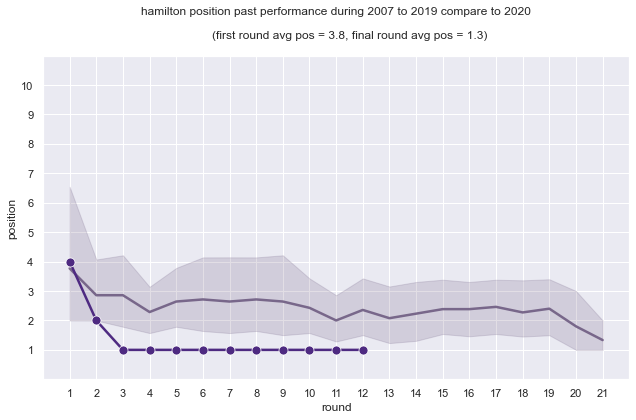

(<Figure size 648x432 with 1 Axes>,
 <AxesSubplot:title={'center':'hamilton position past performance during 2007 to 2019 compare to 2020\n\n        (first round avg pos = 3.8, final round avg pos = 1.3)\n        '}, xlabel='round', ylabel='position'>)

In [787]:
plot_driver_performance("hamilton",1950,2019,2020)

first round position avg = 7.2, final round position avg = 5.0


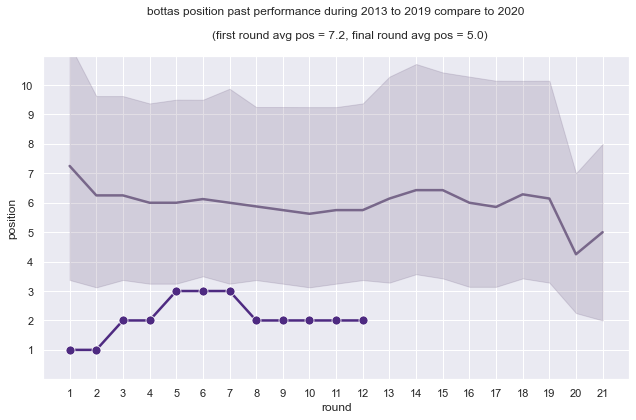

(<Figure size 648x432 with 1 Axes>,
 <AxesSubplot:title={'center':'bottas position past performance during 2013 to 2019 compare to 2020\n\n        (first round avg pos = 7.2, final round avg pos = 5.0)\n        '}, xlabel='round', ylabel='position'>)

In [791]:
plot_driver_performance("bottas",1950,2019,2020)

first round position avg = 9.5, final round position avg = 4.0


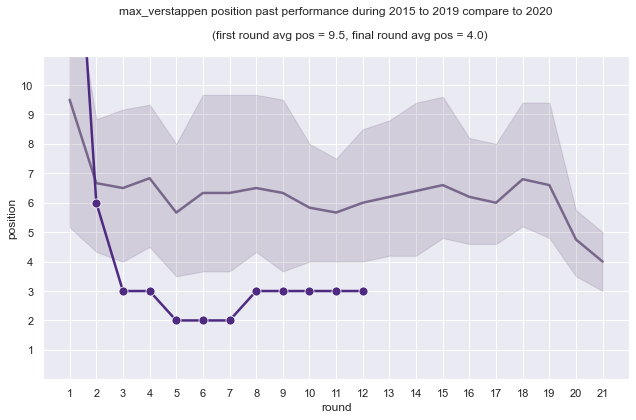

(<Figure size 648x432 with 1 Axes>,
 <AxesSubplot:title={'center':'max_verstappen position past performance during 2015 to 2019 compare to 2020\n\n        (first round avg pos = 9.5, final round avg pos = 4.0)\n        '}, xlabel='round', ylabel='position'>)

In [790]:
plot_driver_performance("max_verstappen",1950,2019,2020)

first round position avg = 13.2, final round position avg = 6.0


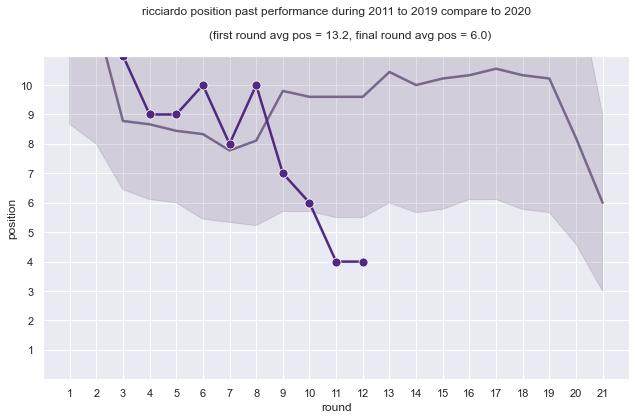

In [789]:
f,ax = plot_driver_performance("ricciardo",1950,2019,2020)
ax.set_ylim(3,14)
ax.set_yticks(range(3,14))
plt.show()

### Result analysis

### 2020 Formula One World Championship analysis

In [322]:
df_21 = get_df("""
SELECT round,grand_prix,driverRef,driver_nationality,constructor, age_at_race,grid, position,points FROM f1_db.result_view where year = 2020;
""")
df_21.head()

,round,grand_prix,driverRef,driver_nationality,constructor,age_at_race,grid,position,points
0,1,Austrian Grand Prix,giovinazzi,Italian,Alfa Romeo,26.6,18,9.0,2.0
1,1,Austrian Grand Prix,raikkonen,Finnish,Alfa Romeo,40.7,19,NaN,0.0
2,1,Austrian Grand Prix,gasly,French,AlphaTauri,24.4,12,7.0,6.0
3,1,Austrian Grand Prix,kvyat,Russian,AlphaTauri,26.2,13,12.0,0.0
4,1,Austrian Grand Prix,leclerc,Monegasque,Ferrari,22.7,7,2.0,18.0


#### Top 8 Formula One 2020 accumulative driver points (Up to round 12)

In [328]:
df_21[["driverRef","points"]].groupby(["driverRef"]).sum().sort_values("points",ascending=False).head(8)

,points
driverRef,
hamilton,256.0
bottas,179.0
max_verstappen,162.0
ricciardo,80.0
leclerc,75.0
perez,74.0
norris,65.0
albon,64.0


#### Current driver position for 2020 season

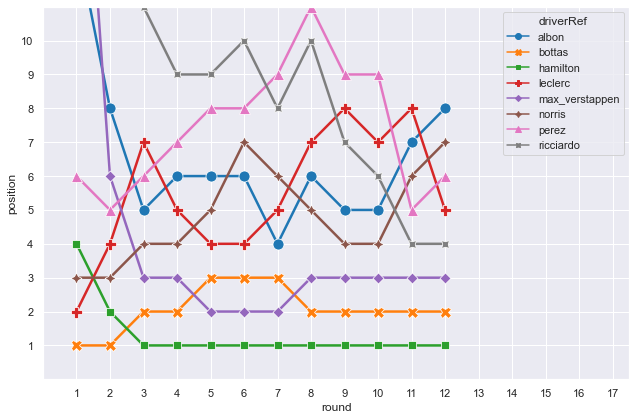

In [397]:
df = df_15[df_15["driverRef"].isin(["hamilton","bottas","max_verstappen","ricciardo","leclerc","perez","norris","albon"])].copy()
df = df[df["year"]==2020]

f, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=df,x="round",y="position",hue="driverRef",style="driverRef",palette="tab10", linewidth=2.5,markers=True, markersize=11, dashes=False)
ax.set_title(f"")
ax.set_xlim(0,17.5)
ax.set_xticks(range(1,18))
ax.set_yticks(range(1,11))
ax.set_ylim(0,11)
plt.tight_layout()

#### Who's going to win Formula One season 2020?

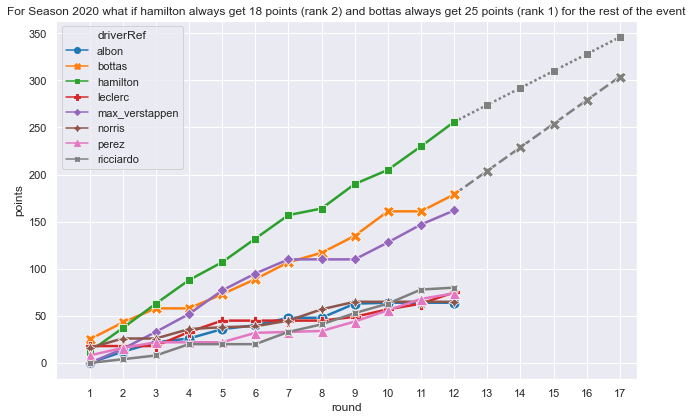

In [444]:
df = df_15[df_15["driverRef"].isin(["hamilton","bottas","max_verstappen","ricciardo","leclerc","perez","norris","albon"])].copy()
df = df[df["year"]==2020]
df = df[["driverRef","round","points"]]

df = df.append({"driverRef":"hamilton","round":13,"points":274}, ignore_index=True)
df = df.append({"driverRef":"hamilton","round":14,"points":292}, ignore_index=True)
df = df.append({"driverRef":"hamilton","round":15,"points":310}, ignore_index=True)
df = df.append({"driverRef":"hamilton","round":16,"points":328}, ignore_index=True)
df = df.append({"driverRef":"hamilton","round":17,"points":346}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":13,"points":204}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":14,"points":229}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":15,"points":254}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":16,"points":279}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":17,"points":304}, ignore_index=True)
df = df.sort_values(["driverRef","round"])
df = df.reset_index(drop=True)

f, ax = plt.subplots(figsize=(9, 6))
df_1 = df[df["round"]<=12]
df_2 = df[df["round"]>=12]
sns.lineplot(data=df_2,x="round",y="points",style="driverRef", color="grey", linewidth=2.5,markers=True, markersize=11, legend=False)
sns.lineplot(data=df_1,x="round",y="points",hue="driverRef",style="driverRef",palette="tab10", linewidth=2.5,markers=True, markersize=11, dashes=False)
ax.set_title(f"For Season 2020 what if hamilton always get 18 points (rank 2) and bottas always get 25 points (rank 1) for the rest of the event")
ax.set_xlim(0,17.5)
ax.set_xticks(range(1,18))
# ax.annotate("346", (17, 350), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

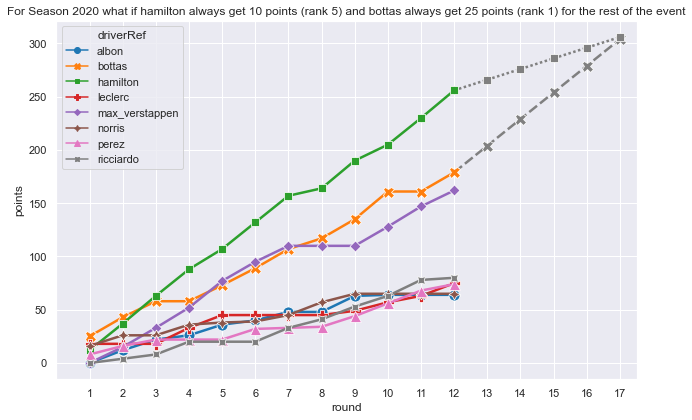

In [443]:
df = df_15[df_15["driverRef"].isin(["hamilton","bottas","max_verstappen","ricciardo","leclerc","perez","norris","albon"])].copy()
df = df[df["year"]==2020]
df = df[["driverRef","round","points"]]

df = df.append({"driverRef":"hamilton","round":13,"points":266}, ignore_index=True)
df = df.append({"driverRef":"hamilton","round":14,"points":276}, ignore_index=True)
df = df.append({"driverRef":"hamilton","round":15,"points":286}, ignore_index=True)
df = df.append({"driverRef":"hamilton","round":16,"points":296}, ignore_index=True)
df = df.append({"driverRef":"hamilton","round":17,"points":306}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":13,"points":204}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":14,"points":229}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":15,"points":254}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":16,"points":279}, ignore_index=True)
df = df.append({"driverRef":"bottas","round":17,"points":304}, ignore_index=True)
df = df.sort_values(["driverRef","round"])
df = df.reset_index(drop=True)

f, ax = plt.subplots(figsize=(9, 6))
df_1 = df[df["round"]<=12]
df_2 = df[df["round"]>=12]
sns.lineplot(data=df_2,x="round",y="points",style="driverRef", color="grey", linewidth=2.5,markers=True, markersize=11, legend=False)
sns.lineplot(data=df_1,x="round",y="points",hue="driverRef",style="driverRef",palette="tab10", linewidth=2.5,markers=True, markersize=11, dashes=False)
ax.set_title(f"For Season 2020 what if hamilton always get 10 points (rank 5) and bottas always get 25 points (rank 1) for the rest of the event")
ax.set_xlim(0,17.5)
ax.set_xticks(range(1,18))
# ax.annotate("346", (17, 350), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
plt.tight_layout()

### Laptime analysis

#### Average fastest lap speed (Winner)

In [512]:
df_22 = get_df("""
SELECT year, round(avg(fastestLapSpeed),2) as avg_fastest_lap_speed FROM f1_db.result_view where year >= 2004 and year <= 2019 and position = 1 group by year order by year
""")

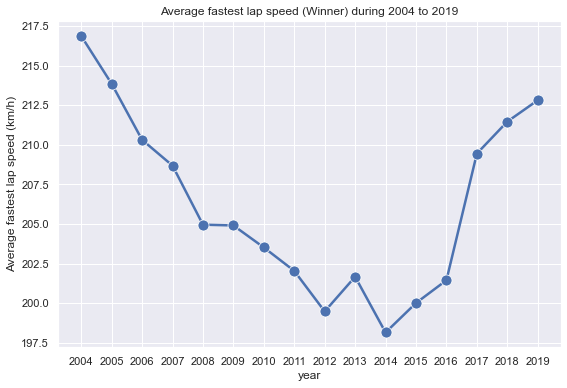

In [514]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(data=df_22,x="year",y="avg_fastest_lap_speed",palette="tab10", linewidth=2.5,marker="o", markersize=11, dashes=False)
ax.set_title("Average fastest lap speed (Winner) during 2004 to 2019")
ax.set_xticks(range(2004,2020))
ax.set(ylabel="Average fastest lap speed (km/h)")
plt.show()

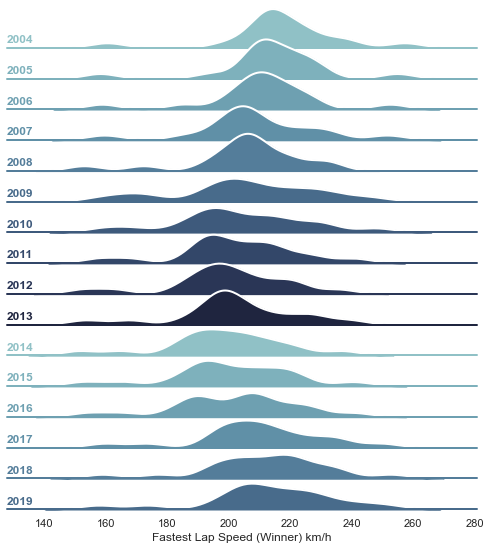

In [793]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = get_df("""
SELECT year, fastestLapSpeed FROM f1_db.result_view where year >= 2004 and year <=2019 and position = 1
""")
df["fastestLapSpeed"] = df["fastestLapSpeed"].astype("float")

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette=pal)
# Draw the densities in a few steps
g.map(sns.kdeplot, "fastestLapSpeed",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "fastestLapSpeed", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "fastestLapSpeed")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.set(xlabel='Fastest Lap Speed (Winner) km/h')
plt.show()

#### Final round 2020 circuit analysis

In [582]:
df_23 = get_df("""
SELECT year,round,circuitRef,location,driverRef,round(fastestLapSpeed,1) as fastestLapSpeed  FROM f1_db.result_view where circuitRef = "yas_marina" and position = 1
order by year,round
""")
df_23

,year,round,circuitRef,location,driverRef,fastestLapSpeed
0,2009,17,yas_marina,Abu Dhabi,vettel,199.4
1,2010,19,yas_marina,Abu Dhabi,vettel,196.5
2,2011,18,yas_marina,Abu Dhabi,hamilton,193.3
3,2012,18,yas_marina,Abu Dhabi,raikkonen,191.4
4,2013,17,yas_marina,Abu Dhabi,vettel,192.5
5,2014,19,yas_marina,Abu Dhabi,hamilton,189.3
6,2015,19,yas_marina,Abu Dhabi,rosberg,189.8
7,2016,21,yas_marina,Abu Dhabi,hamilton,190.2
8,2017,20,yas_marina,Abu Dhabi,bottas,198.7
9,2018,21,yas_marina,Abu Dhabi,hamilton,197.3


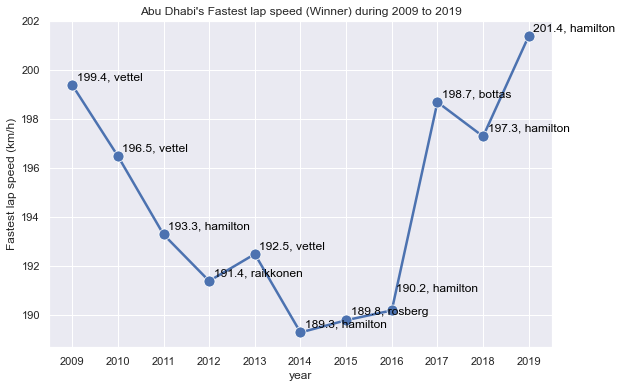

In [583]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(data=df_23,x="year",y="fastestLapSpeed",palette="tab10", linewidth=2.5,marker="o", markersize=11, dashes=False)
ax.set_title("Abu Dhabi's Fastest lap speed (Winner) during 2009 to 2019")
ax.set_xticks(range(2009,2020))
ax.set(ylabel="Fastest lap speed (km/h)")
for i,v in df_23.iterrows():
    if i == 7:
        offset = 0.8
    else:
        offset = 0.2
    ax.text(v.year+0.1,v.fastestLapSpeed+offset,f"{v.fastestLapSpeed}, {v.driverRef}",color='black')
# plt.tight_layout()
plt.show()

In [585]:
df_24 = get_df("""
SELECT * FROM f1_db.laptime_view where circuitRef = "yas_marina";
""")
df_24.head()

,year,round,grand_prix,circuitRef,location,circuit_country,driverRef,nationality,age_at_race,lap,position,time,milliseconds
0,2009,17,Abu Dhabi Grand Prix,yas_marina,Abu Dhabi,UAE,hamilton,British,24.8,1,1,1:49.107,109107
1,2009,17,Abu Dhabi Grand Prix,yas_marina,Abu Dhabi,UAE,hamilton,British,24.8,2,1,1:43.788,103788
2,2009,17,Abu Dhabi Grand Prix,yas_marina,Abu Dhabi,UAE,hamilton,British,24.8,3,1,1:42.715,102715
3,2009,17,Abu Dhabi Grand Prix,yas_marina,Abu Dhabi,UAE,hamilton,British,24.8,4,1,1:42.136,102136
4,2009,17,Abu Dhabi Grand Prix,yas_marina,Abu Dhabi,UAE,hamilton,British,24.8,5,1,1:41.620,101620


In [699]:
def plot_avg_lap_speed_yas_marina(driver):
    df = df_24[df_24["driverRef"] == driver].copy()
    df = df[df["year"] >=2015]
    df["lap_speed"] = round(5.554 / (df["milliseconds"]/ 3600000),1)
    min_year = df["year"].min()
    max_year = df["year"].max()
    avg_speed = round(df["lap_speed"].mean(),1)

    f, ax = plt.subplots(figsize=(9, 6))
    # df_1 = df[df["year"]<=2019]
    # df_2 = df[df["year"]==2019]
    sns.lineplot(data=df,x="lap",y="lap_speed", color="#6E5C81", linewidth=2.5,markers=False, dashes=False)
    # sns.lineplot(data=df_2,x="lap",y="lap_speed", color="red", linewidth=2.5,markers=False, dashes=False)
    ax.set_title(f"{driver}'s avg lap speed on Abu Dhabi circuit during {min_year} to {max_year}")
    ax.set(ylabel="Avg speed (km/h)")
    ax.set_xticks(range(0,56,3))
    ax.plot([avg_speed]*55, color='green', linestyle='dashed')
    ax.text(54, avg_speed - 1.5,f"Average = {avg_speed} km/h", color='green',horizontalalignment='right')
    plt.tight_layout()
    plt.show()

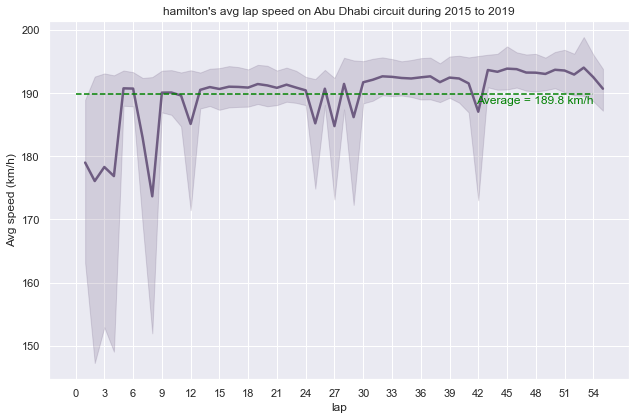

In [700]:
plot_avg_lap_speed_yas_marina("hamilton")

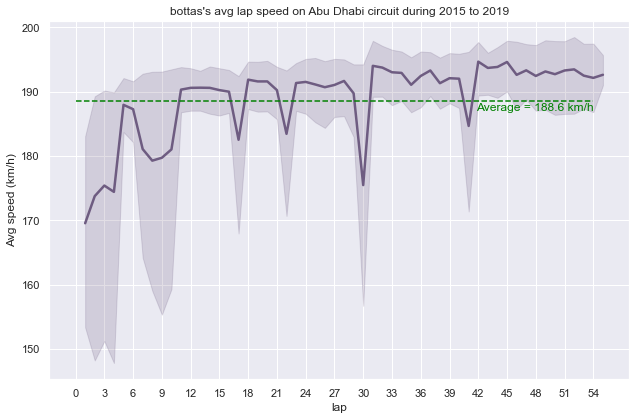

In [701]:
plot_avg_lap_speed_yas_marina("bottas")

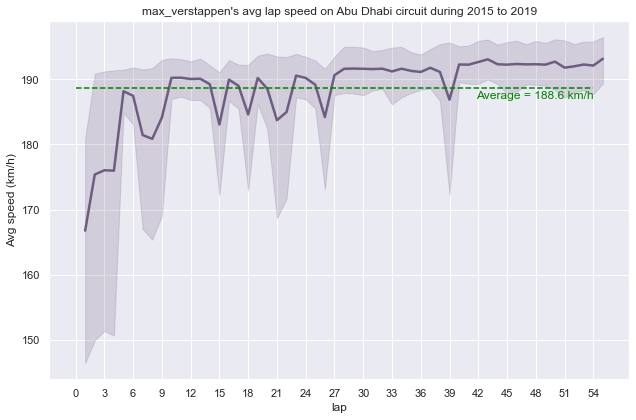

In [702]:
plot_avg_lap_speed_yas_marina("max_verstappen")

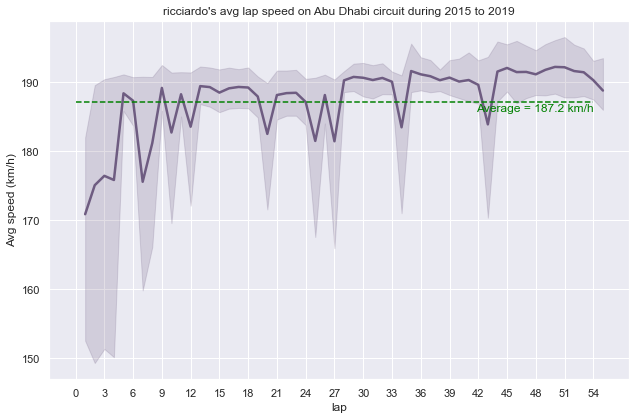

In [704]:
plot_avg_lap_speed_yas_marina("ricciardo")